# Plotting the results

A simple script to check plots from the first part of the lab.

In [3]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

During the lab, the peak energies and pressures are recorded. These results are input here as arrays. Data from spring 2017 is used here as an example.

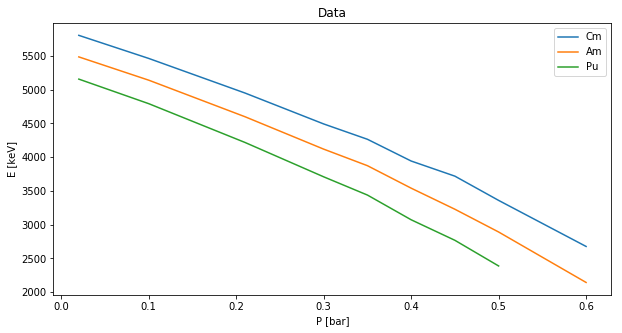

In [80]:
# Measured pressure and energies from the lab
P = [0.02, 0.1, 0.21, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6]
E_cm = [5804, 5462, 4950, 4492, 4265, 3943, 3719, 3360, 2678]
E_am = [5485, 5140, 4599, 4119, 3874, 3541, 3229, 2892, 2145]
E_pu = [5156, 4792, 4218, 3709, 3439, 3073, 2769, 2389, np.nan]

# Plot to check
plt.figure(figsize=[10,5])
plt.plot(P, E_cm, label = 'Cm')
plt.plot(P, E_am, label = 'Am')
plt.plot(P, E_pu, label = 'Pu')
plt.xlabel('P [bar]')
plt.ylabel('E [keV]')
plt.title('Data')
plt.legend()

A fit can be applied to the data to find the P required for zero E.

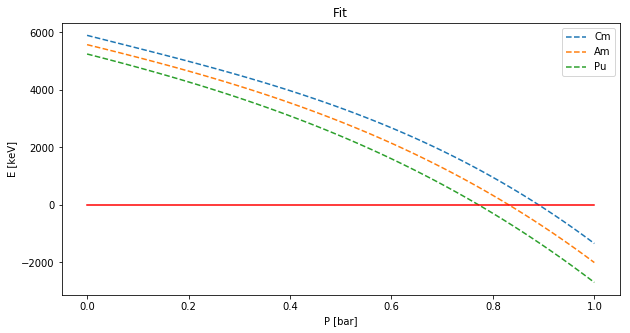

In [81]:
# A simple polynomial fit 
P_lin = np.linspace(0,1.0,100)
fit_E_cm = np.poly1d(np.polyfit(P, E_cm, 3))
fit_E_am = np.poly1d(np.polyfit(P, E_am, 3))
# ignore NaNs
fit_E_pu = np.poly1d(np.polyfit(P[:-1], E_pu[:-1], 3))

# Plot to check
plt.figure(figsize=[10,5])
plt.plot(P_lin, fit_E_cm(P_lin), '--', label = 'Cm')
plt.plot(P_lin, fit_E_am(P_lin), '--', label = 'Am')
plt.plot(P_lin, fit_E_pu(P_lin), '--', label = 'Pu')
plt.plot(P_lin, np.zeros(np.shape(P_lin)[0]), color = 'red')
plt.legend()
plt.xlabel('P [bar]')
plt.ylabel('E [keV]')
plt.title('Fit')

# Find P at which E = 0
P_0_cm = np.real(fit_E_cm.r)
P_0_cm = P_0_cm[P_0_cm > 0]
P_0_am = np.real(fit_E_am.r)
P_0_am = P_0_am[P_0_am > 0]
P_0_pu = np.real(fit_E_pu.r)
P_0_pu = P_0_pu[P_0_pu > 0]

A relationship between P and x is derived to convert from P to x. Assuming a source-detector distance of 10 cm, and a range equal to this when E = 0, the conversion can take place.

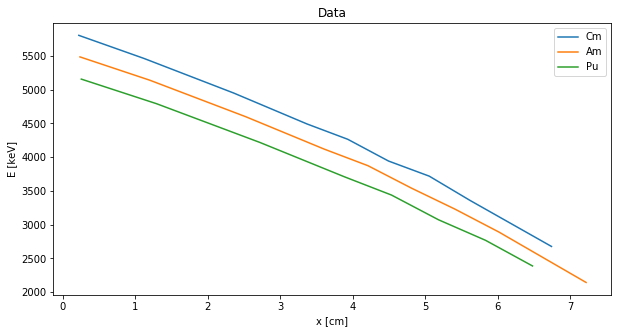

In [82]:
# Function to describe relationship between x and P
def P_to_x(P, P_0, x_0):
    x = (P * x_0) / P_0
    return x

# Known values
P_atm = 1
#x_atm = 4 
x_0 = 10 # [cm]

# Conversion
x_cm = []
x_am = []
x_pu = []
for i in range(len(P)):
    x_cm.append(P_to_x(P[i], P_0_cm, x_0))
    x_am.append(P_to_x(P[i], P_0_am, x_0))
    x_pu.append(P_to_x(P[i], P_0_pu, x_0))
x_cm = np.array(x_cm)
x_am = np.array(x_am)
x_pu = np.array(x_pu)

# plot to check
plt.figure(figsize=[10,5])
plt.plot(x_cm, E_cm, label = 'Cm')
plt.plot(x_am, E_am, label = 'Am')
plt.plot(x_pu, E_pu, label = 'Pu')
plt.xlabel('x [cm]')
plt.ylabel('E [keV]')
plt.title('Data')
plt.legend()

Once E is known as a function of x, An estimate for the stopping power (-dE/dx) can be calculated and plotted, and one can notice the Bragg peak.

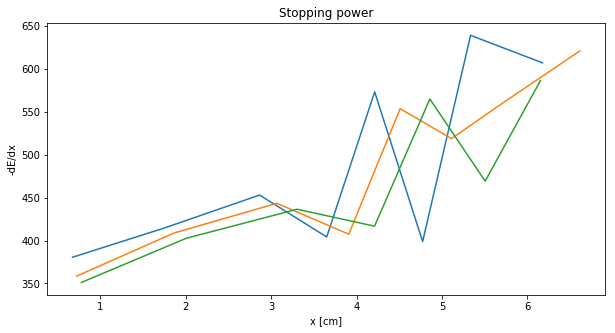

In [87]:
# Find dE/dx and x_avg
x_avg_cm = []
de_dx_cm = []
x_avg_am = []
de_dx_am = []
x_avg_pu = []
de_dx_pu = []
for i in range(len(P) - 1):
    x_avg_cm.append((x_cm[i+1] + x_cm[i]) / 2)
    de_dx_cm.append((E_cm[i+1] - E_cm[i]) / (x_cm[i+1] - x_cm[i]))
    x_avg_am.append((x_am[i+1] + x_am[i]) / 2)
    de_dx_am.append((E_am[i+1] - E_am[i]) / (x_am[i+1] - x_am[i]))
    x_avg_pu.append((x_pu[i+1] + x_pu[i]) / 2)
    de_dx_pu.append((E_pu[i+1] - E_pu[i]) / (x_pu[i+1] - x_pu[i]))
    
# Plot dE/dx and x_avg
plt.figure(figsize=[10,5])
plt.plot(x_avg_cm, np.array(de_dx_cm) * -1, label = 'Cm')
plt.plot(x_avg_am, np.array(de_dx_am) * -1, label = 'Am')
plt.plot(x_avg_pu, np.array(de_dx_pu) * -1, label = 'Pu')
plt.title('Stopping power')
plt.xlabel('x [cm]')
plt.ylabel('-dE/dx')